In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [13]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


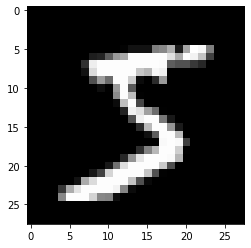

In [14]:
plt.imshow(X_train[0], cmap='gray')

In [15]:
y_train[0]

5

In [16]:
# Expanding dimensions of data 
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [17]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [18]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train, X_test = X_train/255, X_test/255

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import MaxPooling2D, Conv2D

def my_convnet_1():
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation="relu"))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(16, (3,3), activation="relu"))
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())
    model.add(Dense(100, activation="relu"))

    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))

    model.compile()
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=["accuracy"])
    return model



In [23]:
model = my_convnet_1()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               40100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [26]:
history = model.fit(X_train, y_train, epochs=8, validation_split=0.2, batch_size=256, verbose=1, shuffle=True)

Epoch 1/8
188/188 [==============================] - 26s 135ms/step - loss: 0.2916 - accuracy: 0.9097 - val_loss: 0.0661 - val_accuracy: 0.9798
Epoch 2/8
188/188 [==============================] - 25s 136ms/step - loss: 0.1148 - accuracy: 0.9665 - val_loss: 0.0648 - val_accuracy: 0.9826
Epoch 3/8
188/188 [==============================] - 26s 136ms/step - loss: 0.0965 - accuracy: 0.9719 - val_loss: 0.0670 - val_accuracy: 0.9832
Epoch 4/8
188/188 [==============================] - 25s 135ms/step - loss: 0.0863 - accuracy: 0.9736 - val_loss: 0.0471 - val_accuracy: 0.9867
Epoch 5/8
188/188 [==============================] - 25s 135ms/step - loss: 0.0806 - accuracy: 0.9763 - val_loss: 0.0579 - val_accuracy: 0.9836
Epoch 6/8
188/188 [==============================] - 25s 135ms/step - loss: 0.0735 - accuracy: 0.9789 - val_loss: 0.0523 - val_accuracy: 0.9857
Epoch 7/8
188/188 [==============================] - 25s 135ms/step - loss: 0.0737 - accuracy: 0.9777 - val_loss: 0.0499 - val_accuracy:

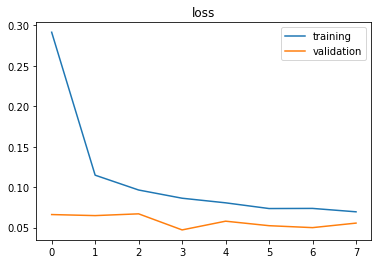

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['training', 'validation'])
plt.show()

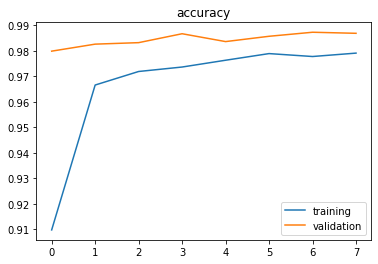

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['training', 'validation'])
plt.show()

In [29]:
score = model.evaluate(X_test, y_test, verbose=0)

In [30]:
print('error', score[0])
print('accuracy', score[1])

error 0.041277091950178146
accuracy 0.9872000217437744


In [31]:
model.save("CNN_MNIST_model.h5")

In [32]:
from google.colab import files
files.download("CNN_MNIST_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>